# Understanding NumPy ndarrays

<b>Functions and attributes:</b> .tolist(), from skimage import data, plt.imshow(), .strides

In [1]:
import numpy as np

### Making ndarrays

In [5]:
# Make a 3D list
three_dim_list = [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]

# Convert into a 3D array
three_dim_array = np.array(three_dim_list)
print(three_dim_array)

# Can convert back
back_to_a_list = three_dim_array.tolist()

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [8]:
# Indexing
three_dim_array[1, 0, 1] = 99

three_dim_array.shape

(2, 2, 2)

In [10]:
# Making arrays
four_dim_array = np.zeros((3, 3, 2, 2))
print(four_dim_array)

[[[[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]]


### Slicing and aggregating

In [12]:
# Make an array of random integers
rng = np.random.default_rng()
array = rng.integers(0, 10, size=36).reshape(4, 3, 3)
print(array)

[[[0 8 6]
  [1 3 1]
  [3 5 6]]

 [[9 6 6]
  [2 5 4]
  [8 7 6]]

 [[2 8 7]
  [0 9 7]
  [9 4 9]]

 [[1 8 0]
  [5 7 8]
  [2 5 7]]]


In [16]:
# Slicing
array[2, :, ::2]

array([[2, 7],
       [0, 7],
       [9, 9]], dtype=int64)

In [21]:
# Boolean indexing
array[array >= 8] = 30
print(array)

[[[ 0 30  6]
  [ 1  3  1]
  [ 3  5  6]]

 [[30  6  6]
  [ 2  5  4]
  [30  7  6]]

 [[ 2 30  7]
  [ 0 30  7]
  [30  4 30]]

 [[ 1 30  0]
  [ 5  7 30]
  [ 2  5  7]]]


In [25]:
# Aggregate functions
print(array.sum(axis=2))

[[36  5 14]
 [42 11 43]
 [39 37 64]
 [31 42 14]]


### Colored Images

Colored images can be represented by 3D arrays!

In [26]:
from skimage import data # Getting the image
import matplotlib.pyplot as plt # Showing the image

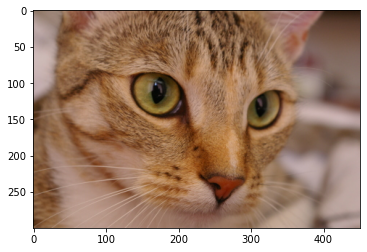

In [28]:
cat = data.chelsea()
plt.imshow(cat)

(300, 451, 3)


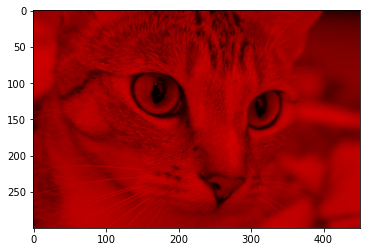

In [30]:
# It's just a ndarray!
print(cat.shape)

# The first two dimensions are position, and the third is RGB color.
red_cat = cat.copy()
red_cat[:, :, 1] = 0
red_cat[:, :, 2] = 0
plt.imshow(red_cat)

(300, 450, 3)


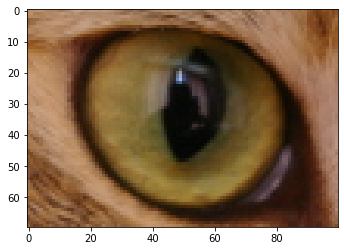

In [33]:
# Cropping the image
remove_last_column = cat[:, :-1, :]
print(remove_last_column.shape)

focus_on_eye = cat[80:150, 120:220, :]
plt.imshow(focus_on_eye)

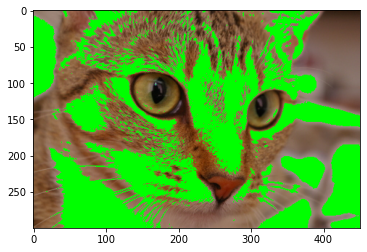

In [34]:
# Color Modification
copycat = cat.copy()
copycat[copycat[:, :, 0] > 160] = [0, 255, 0]
plt.imshow(copycat)

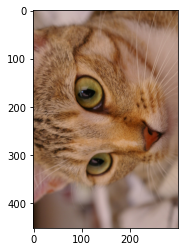

In [35]:
# Transpose the image
plt.imshow(cat.transpose((1, 0, 2)))

### Understanding Stides

In [55]:
my_array = np.arange(12).reshape(4, 3)

print("Datatype: ", my_array.dtype) # 4 bytes
print("Strides: ", my_array.strides) # What does this mean?

Datatype:  int32
Strides:  (12, 4)


In [56]:
# my_array is stored as a contiguous block of memory. 
print("Stored more like this: ", my_array.flatten())

# How we see it
print("\nHow we see it: \n ", my_array)

Stored more like this:  [ 0  1  2  3  4  5  6  7  8  9 10 11]

How we see it: 
  [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [60]:
# Transposing is (ridiculously) cheap
transpose = my_array.transpose()
print(transpose.strides)

# Slicing is (ridiculously) cheap
every_other_element = my_array[::2, ::2]
print(every_other_element.strides)

(4, 12)
(24, 8)
